# College data analysis using *K Means Clustering*

Source:<br> 
https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/college_data.csv<br><br>

## Importing Libraries

In [1]:
# Base libraries
import numpy as np
import scipy as sp

# Visualization libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Algorithm testing libraries
from sklearn.cluster import KMeans


# Suppress scientific notation in Pandas, Numpy
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

## Loading Dataset

In [2]:
url = 'https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/college_data.csv'

# Creating dataset 
df = pd.read_csv(url)

In [3]:
# Initial look at the data 
print(f'Rows: {len(df)}')
print(f'Columns: {len(df.columns)}')
df.head()

Rows: 777
Columns: 18


,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10000,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20000,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90000,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70000,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90000,2,10922,15


## Data Preprocessing

In [4]:
# There are no null values in the dataset
df.isna().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

## EDA
Creating a Scatterplot of Grad Rate vs Room Board where the points are colored by private Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


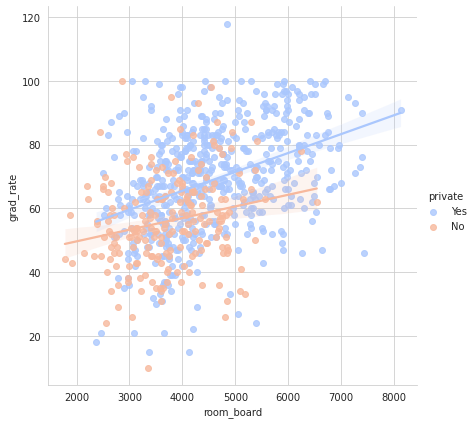

In [5]:
sns.set_style('whitegrid')
sns.lmplot('room_board','grad_rate',data=df, hue='private',
           palette='coolwarm',height=6,aspect=1,fit_reg=True)

Scatterplot of f_undergrad vs Outstate
<br/>Two feature dimensions separate out based on type of college

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


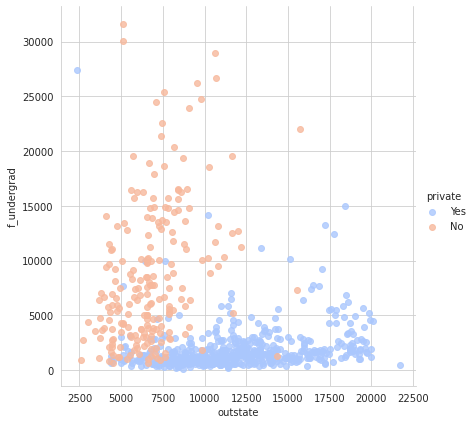

In [6]:
sns.set_style('whitegrid')
sns.lmplot('outstate','f_undergrad',data=df, hue='private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

Boxplot of student-faculty ratio based on type of college

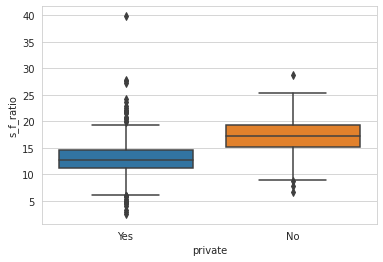

In [7]:
sns.boxplot(x='private',y='s_f_ratio',data=df)

Boxplot of Percentage of Alumni who donate based on type of college

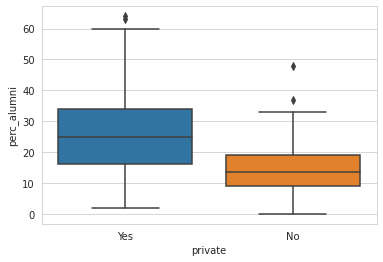

In [8]:
sns.boxplot(x='private',y='perc_alumni',data=df)

Histogram for Out of Station Students' Tuition based on Private Column

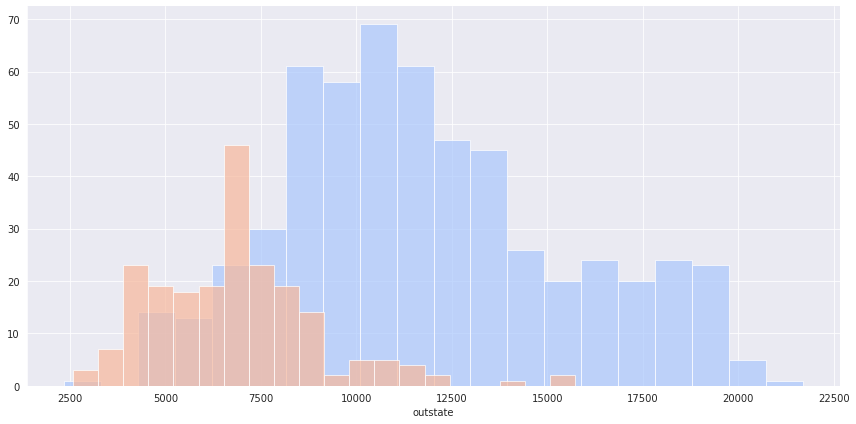

In [9]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'outstate',bins=20,alpha=0.7)

Stack histogram for Grad Rate for Private Column

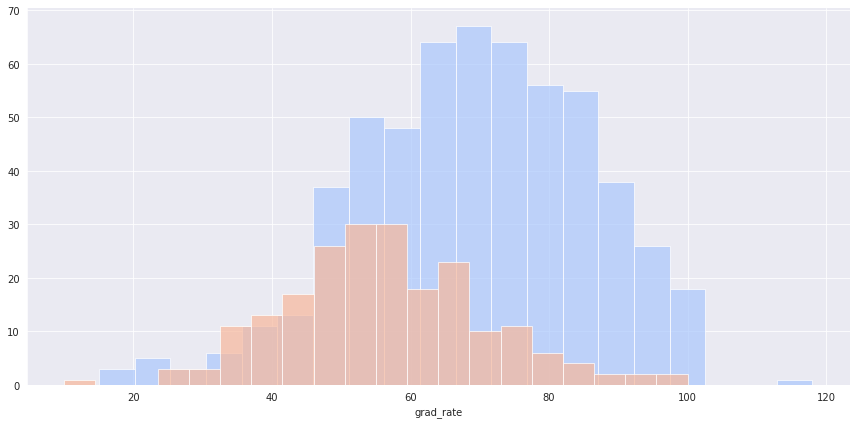

In [10]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'grad_rate',bins=20,alpha=0.7)

It seems a private school has graduation rate greater than 100%

In [11]:
df[df['grad_rate'] > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.30000,20,7697,118


In [12]:
df['grad_rate'][95] = 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df[df['grad_rate'] > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate


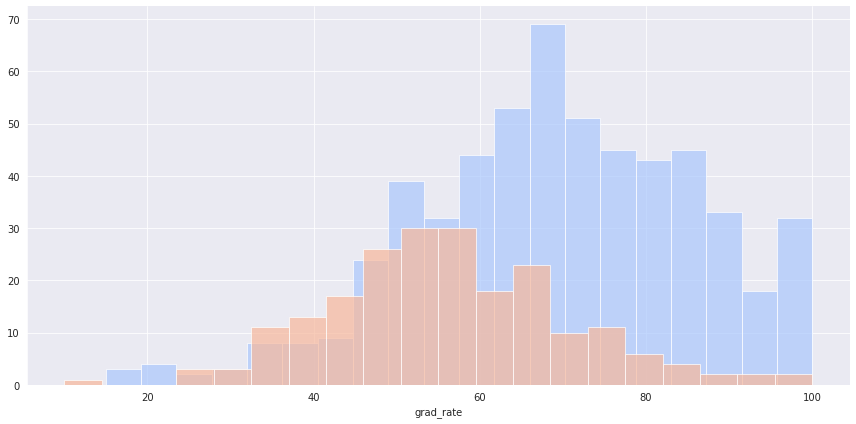

In [14]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'grad_rate',bins=20,alpha=0.7)

## K_Means Clustering using Python Libraries


In [15]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=300,n_init=20)

In [16]:
kmeans.fit(df[['room_board', 'expend']])

KMeans(n_clusters=2, n_init=20, tol=0.001)

In [17]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[ 4187.68175,  8233.97372],
       [ 5622.13043, 20279.1413 ]])

In [18]:
# Stats for Private Colleges
df[df["private"] == 'Yes'].describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000,565.00000
mean,1977.92920,1305.70265,456.94513,29.33097,56.95752,1872.16814,433.96637,11801.69381,4586.14336,547.50619,1214.44071,71.09381,78.53451,12.94549,25.89027,10486.35398,68.96637
std,2443.34132,1369.54948,457.52914,17.85139,19.58836,2110.66177,722.37049,3707.47082,1089.69756,174.93230,632.87965,17.35089,15.45025,3.51857,12.40075,5682.57659,16.67303
min,81.00000,72.00000,35.00000,1.00000,9.00000,139.00000,1.00000,2340.00000,2370.00000,250.00000,250.00000,8.00000,24.00000,2.50000,2.00000,3186.00000,15.00000
25%,619.00000,501.00000,206.00000,17.00000,42.00000,840.00000,63.00000,9100.00000,3736.00000,450.00000,800.00000,60.00000,68.00000,11.10000,16.00000,7477.00000,58.00000
50%,1133.00000,859.00000,328.00000,25.00000,55.00000,1274.00000,207.00000,11200.00000,4400.00000,500.00000,1100.00000,73.00000,81.00000,12.70000,25.00000,8954.00000,69.00000
75%,2186.00000,1580.00000,520.00000,36.00000,70.00000,2018.00000,541.00000,13970.00000,5400.00000,600.00000,1500.00000,85.00000,92.00000,14.50000,34.00000,11625.00000,81.00000
max,20192.00000,13007.00000,4615.00000,96.00000,100.00000,27378.00000,10221.00000,21700.00000,8124.00000,2340.00000,6800.00000,100.00000,100.00000,39.80000,64.00000,56233.00000,100.00000


In [19]:
# Stats for Non-Private Colleges
df[df["private"] == 'No'].describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000
mean,5729.91981,3919.28774,1640.87264,22.83491,52.70283,8571.00472,1978.18868,6813.41038,3748.24057,554.37736,1676.98113,76.83491,82.81604,17.13915,14.35849,7458.31604,56.04245
std,5370.67533,3477.26628,1261.59201,16.18044,20.09106,6467.69609,2321.03470,2145.24839,858.13993,135.72993,677.51568,12.31753,12.06967,3.41805,7.51893,2695.54161,14.58341
min,233.00000,233.00000,153.00000,1.00000,12.00000,633.00000,9.00000,2580.00000,1780.00000,96.00000,400.00000,33.00000,33.00000,6.70000,0.00000,3605.00000,10.00000
25%,2190.75000,1563.25000,701.75000,12.00000,37.00000,3601.00000,600.00000,5366.00000,3121.50000,500.00000,1200.00000,71.00000,76.00000,15.10000,9.00000,5715.00000,46.00000
50%,4307.00000,2929.50000,1337.50000,19.00000,51.00000,6785.50000,1375.00000,6609.00000,3708.00000,550.00000,1649.00000,78.50000,86.00000,17.25000,13.50000,6716.50000,55.00000
75%,7722.50000,5264.00000,2243.75000,27.50000,65.00000,12507.00000,2495.25000,7844.00000,4362.00000,612.00000,2051.25000,86.00000,92.00000,19.32500,19.00000,8570.25000,65.00000
max,48094.00000,26330.00000,6392.00000,95.00000,100.00000,31643.00000,21836.00000,15732.00000,6540.00000,1125.00000,4288.00000,103.00000,100.00000,28.80000,48.00000,16527.00000,100.00000


In [20]:
## Cluster Labels

kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [21]:
converter = lambda cluster : 1 if cluster == 'Yes' else 0

In [22]:
df1 = df
df1['Cluster'] = df['private'].apply(converter)

In [23]:
df1.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10000,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20000,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90000,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70000,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90000,2,10922,15,1


### Metrics

In [24]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=50,n_init=10)
kmeans.fit(df[['room_board', 'expend']])
clus_cent=kmeans.cluster_centers_
df_desc=pd.DataFrame(df[['room_board', 'expend']].describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
a=np.array(kmclus.diff().iloc[1])
centroid_diff = pd.DataFrame(abs(a),columns=['K-means cluster centroid-distance'],index=df_desc.columns)
centroid_diff['Mean of corresponding entity (private)']=np.array(df[['room_board', 'expend']][df['private']== 'Yes'].mean())
centroid_diff['Mean of corresponding entity (public)']=np.array(df[['room_board', 'expend']][df['private']== 'No'].mean())
centroid_diff

,K-means cluster centroid-distance,Mean of corresponding entity (private),Mean of corresponding entity (public)
room_board,1411.14925,4586.14336,3748.24057
expend,11935.01276,10486.35398,7458.31604


## K_Means Algorithm using our custom User Defined Function

In [25]:
# Considering Two Columns, Expenditure, Room_Board costs

df2 = df[["room_board", "expend"]]
df2['Cluster'] = df["private"].apply(converter)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,room_board,expend,Cluster
0,3300,7041,1
1,6450,10527,1
2,3750,8735,1
3,5450,19016,1
4,4120,10922,1


In [26]:
from math import sqrt
def distance(p1, p2): 
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    return sqrt((x2-x1) ** 2 + (y2-y1) ** 2)

In [27]:
cluster_choice = lambda d0, d1: 0 if d0 < d1 else 1

In [28]:
def calculate_centroids(point):
  
  arr1 = point['x']
  arr2 = point['y']

  return (np.mean(arr1), np.mean(arr2))

In [29]:
# Two Clusters, Private and Public
centroids = [(df2['room_board'][0], df2['expend'][0]), (df2['room_board'][1], df2['expend'][1])]
clusters = {
      0: {
          'x': [],
          'y': []
      },
      1: {
          'x': [],
          'y': []
      }
    }

for k in range(20):

    labels = []

    for row in df2.iterrows():

        r = dict(row[1])

        point = (r['room_board'], r['expend'])
        if len(centroids) == 0:
          centroids = [(df2['room_board'][0], df2['expend'][0]), (df2['room_board'][1], df2['expend'][1])]
        d1 = distance(point, centroids[0])
        d2 = distance(point, centroids[1])
        
        
        cluster = cluster_choice(d1, d2)
        clusters[cluster]['x'].append(r['room_board'])
        clusters[cluster]['y'].append(r['room_board'])

        labels.append(cluster)
    
    centroids = [calculate_centroids(clusters[0]), calculate_centroids(clusters[1])]
    clusters = {
      0: {
          'x': [],
          'y': []
      },
      1: {
          'x': [],
          'y': []
      }
    }
    centroids = []
    
np.array(labels)

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

# Comparing Metrics between SKLearn Function and User Defined Function

In [30]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(df1.drop(['private'], axis=1), kmeans.labels_)
db_index

1.1291127181417537

In [31]:
db_index_custom = davies_bouldin_score(df2, kmeans.labels_)
db_index_custom

0.6423167729013696